In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データを読み込む
train = np.loadtxt('kaiki.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

In [3]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)


In [4]:
# パラメータを初期化
theta = np.random.rand(3)

In [5]:
# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

In [6]:
X = to_matrix(train_z)

In [7]:
# 予測関数
def f(x):
    return np.dot(x, theta)

In [8]:
# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [9]:
# 学習率
ETA = 1e-3

In [10]:
# 誤差の差分
diff = 1

In [11]:
# 更新回数
count = 0

In [12]:
# 学習を繰り返す
error = MSE(X, train_y)
while diff > 1e-2:
    # 確率的勾配降下法でパラメータ更新
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x

    # 前回の誤差との差分を計算
    current_error = MSE(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [8.60569686 1.89507481 9.19621656], 差分 = 15049.9094
2回目: theta = [16.68679144  3.72414869 17.39474666], 差分 = 13547.8339
3回目: theta = [24.4470448   5.54411916 25.13265891], 差分 = 12270.7449
4回目: theta = [31.90724495  7.33274163 32.34664345], 差分 = 11058.4370
5回目: theta = [39.07915928  9.10350433 39.12363269], 差分 = 10012.5790
6回目: theta = [45.97441783 10.85188596 45.46252494], 差分 = 9054.5856
7回目: theta = [52.61709046 12.53811873 51.37252841], 差分 = 8187.0437
8回目: theta = [59.01328437 14.2012019  56.89249387], 差分 = 7420.0571
9回目: theta = [65.17496848 15.84936417 62.06867331], 差分 = 6745.4635
10回目: theta = [71.11332223 17.47356782 66.91087736], 差分 = 6132.3173
11回目: theta = [76.84861742 19.05321442 71.45395887], 差分 = 5589.9722
12回目: theta = [82.37768735 20.62920801 75.69230728], 差分 = 5090.7322
13回目: theta = [87.7174761  22.1803474  79.66869601], 差分 = 4652.2749
14回目: theta = [92.87768687 23.69451904 83.36844975], 差分 = 4244.3111
15回目: theta = [97.86069416 25.20591931 86.81402035], 差分

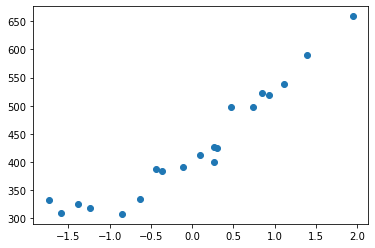

In [15]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')

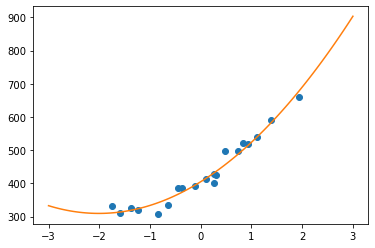

In [18]:
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()